#  Years Dataset

In this notebook I will be working with the **data_by_year_o.csv**.
This is a time-series dataset from which I will try to gain knowledge about how the other features in the dataset are correlated to the year.
I will be using K-means clustering as well as Agglomerative clustering.

In [35]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

## Analysing the dataset

In [51]:
df_years = pd.read_csv('data_by_year_o.csv')

In [52]:
df_years.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [53]:
nRows, nCols = df_years.shape
print(f'This dataset has {nRows} rows and {nCols} columns.')

This dataset has 100 rows and 14 columns.


In [54]:
df_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


## EDA

In [55]:
import plotly.graph_objects as go

fig =go.Figure()
fig.add_trace(go.Scatter(x=df_years['year'], y=df_years['acousticness'], mode='lines',name="acousticness",showlegend=True))
fig.add_trace(go.Scatter(x=df_years['year'], y=df_years['instrumentalness'], mode='lines',name="instrumentalness"))
fig.add_trace(go.Scatter(x=df_years['year'], y=df_years['energy'], mode='lines',name="energy"))
fig.add_trace(go.Scatter(x=df_years['year'], y=df_years['liveness'], mode='lines',name="liveness"))
fig.add_trace(go.Scatter(x=df_years['year'], y=df_years['danceability'], mode='lines',name="danceability"))
fig.add_trace(go.Scatter(x=df_years['year'], y=df_years['speechiness'], mode='lines',name="speechiness"))
fig.add_trace(go.Scatter(x=df_years['year'], y=df_years['valence'], mode='lines',name="valence"))

fig.update_layout(title='Annual average characteristics',height=700)
fig.show()

In [57]:
fig =go.Figure()
fig.add_trace(go.Scatter(x=df_years['year'], y=df_years['popularity'], mode='markers + lines',name="popularity",showlegend=True))
fig.update_layout(title='Popularity over time',height=300)
fig.show()

Calculating the Spearman coefficient to check the direction of association between the attributes year and popularity.

In [17]:
from scipy import stats

stats.spearmanr(df_years['popularity'], df_years['year'])

SpearmanrResult(correlation=0.9786138613861385, pvalue=4.098207156458229e-69)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '2001'),
  Text(1, 0, '2002'),
  Text(2, 0, '2003'),
  Text(3, 0, '2004'),
  Text(4, 0, '2005'),
  Text(5, 0, '2006'),
  Text(6, 0, '2007'),
  Text(7, 0, '2008'),
  Text(8, 0, '2009'),
  Text(9, 0, '2010'),
  Text(10, 0, '2011'),
  Text(11, 0, '2012'),
  Text(12, 0, '2013'),
  Text(13, 0, '2014'),
  Text(14, 0, '2015'),
  Text(15, 0, '2016'),
  Text(16, 0, '2017'),
  Text(17, 0, '2018'),
  Text(18, 0, '2019'),
  Text(19, 0, '2020')])

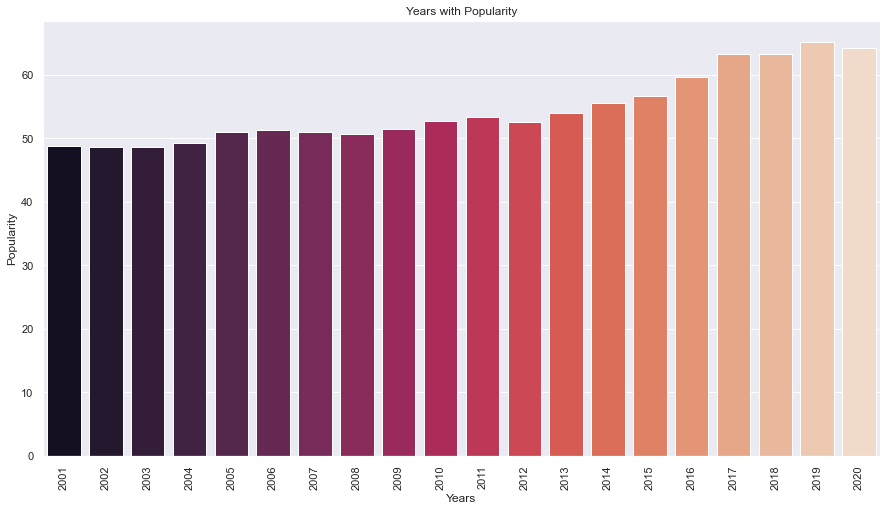

In [8]:
g_pn = df_years.groupby("year")['popularity'].sum().sort_values(ascending=False)[:20]
sns.set(rc={'figure.figsize':(15,8)})
axis = sns.barplot(g_pn.index, g_pn,palette='rocket')
axis.set_title('Years with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Years')
plt.xticks(rotation = 90)

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df_years)

StandardScaler()

In [41]:
df_years.drop(["key","mode"],axis=1,inplace=True)
df_years = df_years.melt("year")

In [69]:
df_years.to_csv('years_preprocessed.csv')

Compare the characteristics of music every 10 years.

In [25]:
import plotly.express as px

fig = px.line_polar(df_years, r="value",theta="variable",line_close=True,
            animation_frame="year",template="plotly_dark",range_r = (0,1))
fig.update_traces(fill='toself')
fig.update_layout(font_size=15)
fig.show()

## 2D PCA

Reducing the dimensionality of the dataset in order to only capture the most important features.

In [60]:
X = df_years.values
X

array([[1.00000000e+00, 1.92100000e+03, 8.86896000e-01, ...,
        3.79326667e-01, 6.53333333e-01, 2.00000000e+00],
       [1.00000000e+00, 1.92200000e+03, 9.38591549e-01, ...,
        5.35549296e-01, 1.40845070e-01, 1.00000000e+01],
       [1.00000000e+00, 1.92300000e+03, 9.57246791e-01, ...,
        6.25492432e-01, 5.38918919e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 2.01800000e+03, 2.67632991e-01, ...,
        4.47921274e-01, 6.32962435e+01, 1.00000000e+00],
       [1.00000000e+00, 2.01900000e+03, 2.78298586e-01, ...,
        4.58817630e-01, 6.52565418e+01, 1.00000000e+00],
       [1.00000000e+00, 2.02000000e+03, 2.19930888e-01, ...,
        5.01047808e-01, 6.43019704e+01, 1.00000000e+00]])

In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents1 = pca.fit_transform(X)

In [62]:
PCA_dataset1 = pd.DataFrame(data = principalComponents1, columns = ['component1', 'component2'] )
PCA_dataset1.head()

,component1,component2
0,-33240.364718,-81.068101
1,61827.030859,-13.142581
2,49354.414349,-15.935195
3,36250.072672,-26.530040
4,42309.853529,-20.858546


<Figure size 432x288 with 0 Axes>

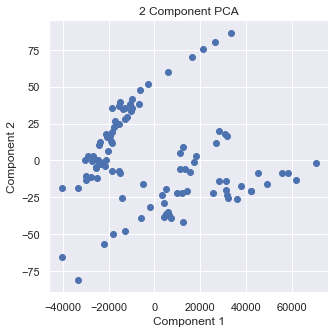

In [63]:
plt.figure()
plt.figure(figsize=(5,5))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
plt.scatter(PCA_dataset1['component1'], PCA_dataset1['component2'])

## 3D PCA

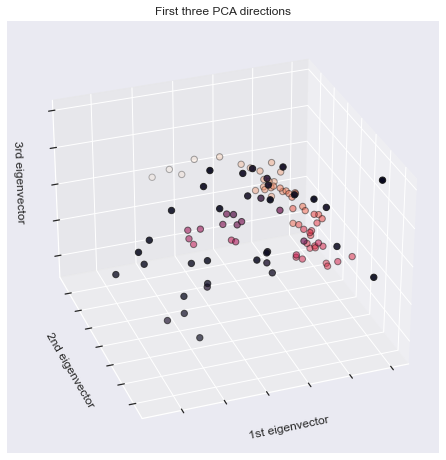

In [64]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

colors = ['navy', 'turquoise', 'darkorange']

y = df_years['popularity']

pca = PCA(n_components=3) #We set the number of components to 3 so we can transform to a 3D space
X_reduced = pca.fit(X).transform(X) # Now we fit the PCA model to X with fit() and apply it to X immediately with transform() 
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

## K-means clustering 

In [66]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_reduced)
    inertia.append(np.sqrt(kmeans.inertia_))

Text(0, 0.5, '$J(C_k)$')

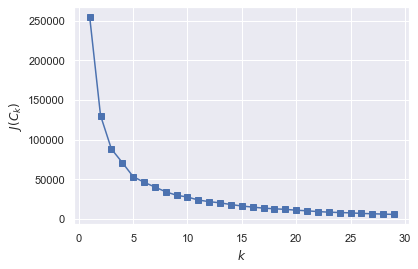

In [67]:
plt.plot(range(1, 30), inertia, marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')

In [71]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(principalComponents1)

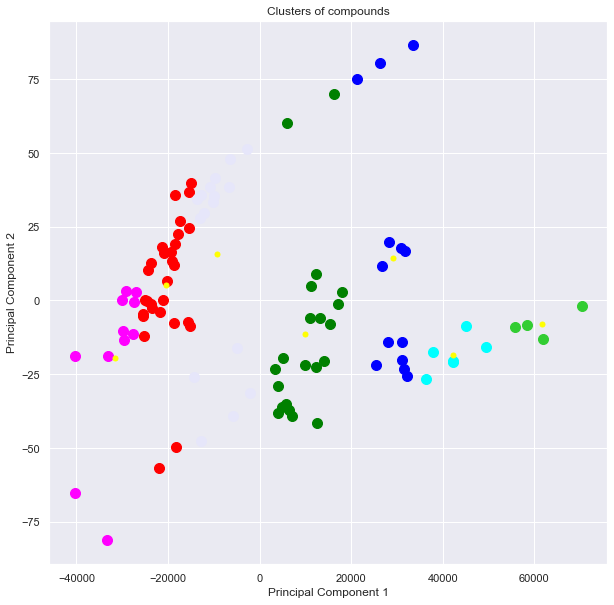

In [72]:
from matplotlib import colors as mcolors

plt.figure(figsize=(10,10))
plt.scatter(principalComponents1[y_kmeans == 0, 0], principalComponents1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(principalComponents1[y_kmeans == 1, 0], principalComponents1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(principalComponents1[y_kmeans == 2, 0], principalComponents1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(principalComponents1[y_kmeans == 3, 0], principalComponents1[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(principalComponents1[y_kmeans == 4, 0], principalComponents1[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(principalComponents1[y_kmeans == 5, 0], principalComponents1[y_kmeans == 5, 1], s = 100, c = 'limegreen', label = 'Cluster 6')
plt.scatter(principalComponents1[y_kmeans == 6, 0], principalComponents1[y_kmeans == 6, 1], s = 100, c = 'lavender', label = 'Cluster 7')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 25, c = 'yellow', label = 'Centroids')
plt.title('Clusters of compounds')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# plt.legend()
plt.show()

## Agglomerative Clustering

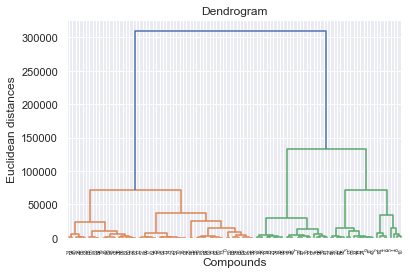

In [73]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(principalComponents1, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Compounds')
plt.ylabel('Euclidean distances')
plt.show()